# Analysis on Aachen
## on opening a new business

The analysis is structured into three different parts: 

* First a dataframe with the districts, their geometry points and rental fees is created.

* Second the most frequent venue type is determined

* Third a socio-demographic anaylsis is conducted

### First of all I am importing/installing the necessary libraries

In [544]:
#Import libraries

#Since I created the notebook on IBM Watson Studio some packages must be installed
#!conda install -c conda-forge geopandas
#!conda install -c conda-forge folium=0.5.0 --yes
#!conda install -c anaconda xlrd --yes
#!conda install -c conda-forge geopy --yes

import pandas as pd
import geopandas as gpd
import numpy as np
import json
import geojson
from pandas.io.json import json_normalize
import io
import requests

from bs4 import BeautifulSoup
import urllib.request, urllib.parse, urllib.error
from geopy.geocoders import Nominatim

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import folium

print('Libraries imported.')

Libraries imported.


# Part 1: Creating a dataframe with districts of aachen
## Including: Coordinates, geometry points and rental fees

### Find the coordinates of Aachen

In [364]:
address = 'Aachen, DE'

geolocator = Nominatim(user_agent="Aachen")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Aachen are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Aachen are 50.776351, 6.083862.


In [365]:
# create map of Aachen using latitude and longitude values
map_aachen = folium.Map(location=[latitude, longitude], zoom_start=12.5)
map_aachen

### Websearch of all districts

In [366]:
site = 'http://postleitzahlen.woxikon.de/plz/aachen'
page = requests.get(site)
soup = BeautifulSoup(page.content, 'lxml')
#print(soup.prettify())
table = soup.find_all('table')[0]
#print(table.prettify())


postaltable = pd.read_html(str(table))
postal = pd.DataFrame(postaltable[0])
postal.columns = ['Post Code','District','Street']
postal.head()

,Post Code,District,Street
0,52062,Aachen Aachen,Hirschgraben
1,52062,Aachen Aachen,Hermannstr.
2,52062,Aachen Aachen,Pontdriesch
3,52062,Aachen Aachen,Mostardstr.
4,52062,Aachen Aachen,Münsterplatz


### Dropping the street column & duplicates

In [367]:
postal = postal.drop(columns = ['Street'], axis = 1)
postal.shape

(1473, 2)

In [368]:
postal_copy = postal
aachen_grouped = postal_copy.drop_duplicates().reset_index(drop = True)
aachen_grouped.head()

,Post Code,District
0,52062,Aachen Aachen
1,52062,Aachen
2,52064,Aachen Aachen
3,52066,Aachen Aachen
4,52068,Aachen Aachen


### Dropping duplicate rows (analysed by manual search)
#### some post codes are used multiple times for different districs | in order to simplify i dropped them

In [369]:
aachen_grouped.drop(aachen_grouped.index[[1,4,6,7,9,10,11,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,32,33,34,35,38,39]], inplace = True)
aachen_grouped.reset_index(drop = True)
aachen_grouped.head()

,Post Code,District
0,52062,Aachen Aachen
1,52064,Aachen Aachen
2,52066,Aachen Aachen
3,52068,Aachen Haaren
4,52070,Aachen Laurensberg
5,52072,Aachen Richterich
6,52074,Aachen Vaalserquartier
7,52076,Aachen Brand
8,52078,Aachen Eilendorf
9,52080,Aachen Verlautenheide


### Searching for the coordinates of each distict

In [370]:
postcodesite = 'https://public.opendatasoft.com/explore/dataset/postleitzahlen-deutschland/download/?format=json&refine.note=Aachen&timezone=Europe/Berlin&lang=en'

postcodedf = pd.read_json(postcodesite)
postcodedf.head()

,datasetid,fields,geometry,record_timestamp,recordid
0,postleitzahlen-deutschland,"{'note': 'Aachen', 'geo_shape': {'type': 'Poly...","{'type': 'Point', 'coordinates': [6.1259155957...",2017-03-25T07:26:36.889+01:00,97b93a1e3172a0448d7f9d6ce60fc016e6e5c7e0
1,postleitzahlen-deutschland,"{'note': 'Aachen', 'geo_shape': {'type': 'Poly...","{'type': 'Point', 'coordinates': [6.1498836797...",2017-03-25T07:26:36.889+01:00,09d97726595374de948585eab7cc96db1b0669fc
2,postleitzahlen-deutschland,"{'note': 'Aachen', 'geo_shape': {'type': 'Poly...","{'type': 'Point', 'coordinates': [6.0864692223...",2017-03-25T07:26:36.889+01:00,0ea5f1e6700d74908ce423605c67864ddf78770c
3,postleitzahlen-deutschland,"{'note': 'Aachen', 'geo_shape': {'type': 'Poly...","{'type': 'Point', 'coordinates': [6.0497212116...",2017-03-25T07:26:36.889+01:00,e970ae2a324485fefb2c2e4f732d6cea303432ae
4,postleitzahlen-deutschland,"{'note': 'Aachen', 'geo_shape': {'type': 'Poly...","{'type': 'Point', 'coordinates': [6.1614222098...",2017-03-25T07:26:36.889+01:00,ac87580927fd4b8f588887c52540ede89412c003
5,postleitzahlen-deutschland,"{'note': 'Aachen', 'geo_shape': {'type': 'Poly...","{'type': 'Point', 'coordinates': [6.0785687250...",2017-03-25T07:26:36.889+01:00,07c4d4fe6c9bf50767465c67c4fece6c378e0298
6,postleitzahlen-deutschland,"{'note': 'Aachen', 'geo_shape': {'type': 'Poly...","{'type': 'Point', 'coordinates': [6.0363417368...",2017-03-25T07:26:36.889+01:00,5a3c50a030c84479febace9ca5035d1c68fedb5e
7,postleitzahlen-deutschland,"{'note': 'Aachen', 'geo_shape': {'type': 'Poly...","{'type': 'Point', 'coordinates': [6.0962483777...",2017-03-25T07:26:36.889+01:00,16f2a6337abddd32ff609711375da7d05a67190c
8,postleitzahlen-deutschland,"{'note': 'Aachen', 'geo_shape': {'type': 'Poly...","{'type': 'Point', 'coordinates': [6.1596628377...",2017-03-25T07:26:36.889+01:00,66fe9a2c25bfe0400e6e625934c127d206ec8a09
9,postleitzahlen-deutschland,"{'note': 'Aachen', 'geo_shape': {'type': 'Poly...","{'type': 'Point', 'coordinates': [6.1048022780...",2017-03-25T07:26:36.889+01:00,08910aebf6fdb532504e2d7067379df1ca4fcd28


In [371]:
postcodedf.shape

(10, 5)

### Accessing the relevant information of the first row as example

In [372]:
postcodedf['geometry'][0]['coordinates']

[6.125915595722462, 50.77975301879342]

In [373]:
#postcodedf['fields'][0]['geo_shape']['coordinates'][0]
postcodedf['fields'][0]['plz']

'52068'

In [375]:
# define the dataframe columns
post_names = ['Post Code', 'Latitude', 'Longitude','Geometry'] 

# instantiate the dataframe
postdf = pd.DataFrame(columns=post_names)
postdf

,Post Code,Latitude,Longitude,Geometry


### Looping through the dataframe to extract the relevant information & sort the dataframe on Post Code

In [376]:
r, c = postcodedf.shape
for i in range(r):
    new_row = pd.Series(data={'Post Code': postcodedf['fields'][i]['plz'], 'Latitude': postcodedf['geometry'][i]['coordinates'][1], 'Longitude': postcodedf['geometry'][i]['coordinates'][0], 'Geometry': postcodedf['fields'][i]['geo_shape']['coordinates'][0]})
    postdf = postdf.append(new_row, ignore_index=True)
    #print(new_row)
#postdf
postdf_sorted = postdf.sort_values('Post Code')
postdf_sorted.reset_index(drop = True)
postdf_sorted.head()

,Post Code,Latitude,Longitude,Geometry
0,52062,50.777065,6.086469,"[[6.0746397, 50.778233399999976], [6.0755047, ..."
1,52064,50.767342,6.078569,"[[6.061015, 50.76446859999999], [6.0612398, 50..."
2,52066,50.757600,6.104802,"[[6.0720627, 50.75066249999998], [6.0732045, 5..."
3,52068,50.779753,6.125916,"[[6.1008512, 50.77993449999999], [6.103057, 50..."
4,52070,50.793840,6.096248,"[[6.0704272, 50.79009389999999], [6.0707235, 5..."
5,52072,50.821910,6.049721,"[[6.0159425, 50.83879619999998], [6.0189456, 5..."
6,52074,50.773768,6.036342,"[[5.9748624, 50.7980367], [5.974951, 50.798094..."
7,52076,50.715195,6.149884,"[[6.0592867, 50.740119599999986], [6.0617563, ..."
8,52078,50.757029,6.161422,"[[6.1172781, 50.7700921], [6.1174023, 50.77054..."
9,52080,50.787902,6.159663,"[[6.109553, 50.8024282], [6.1111558, 50.804500..."


### Combining the dataframes

In [377]:
aachen_grouped.dtypes

Post Code     int64
District     object
dtype: object

In [378]:
postdf_sorted.dtypes

Post Code     object
Latitude     float64
Longitude    float64
Geometry      object
dtype: object

#### Here we can see that Post Code is stored in different datatypes, so I changed one to int64

In [379]:
postdf_sorted['Post Code'] = postdf_sorted['Post Code'].astype(int)

#### Merging the dataframes and renaming the districts without the prefix Aachen

In [380]:
aachendf = pd.merge(aachen_grouped,postdf_sorted)
aachendf['District'] = aachendf['District'].replace({
    'Aachen Aachen': 'Center', 'Aachen Haaren': 'Haaren','Aachen Laurensberg': 'Laurensberg','Aachen Richterich': 'Richterich',
    'Aachen Vaalserquartier': 'Vaalserquartier','Aachen Brand': 'Brand', 'Aachen Eilendorf': 'Eilendorf', 'Aachen Verlautenheide': 'Verlautenheide'})
aachendf.head()

,Post Code,District,Latitude,Longitude,Geometry
0,52062,Center,50.777065,6.086469,"[[6.0746397, 50.778233399999976], [6.0755047, ..."
1,52064,Center,50.767342,6.078569,"[[6.061015, 50.76446859999999], [6.0612398, 50..."
2,52066,Center,50.757600,6.104802,"[[6.0720627, 50.75066249999998], [6.0732045, 5..."
3,52068,Haaren,50.779753,6.125916,"[[6.1008512, 50.77993449999999], [6.103057, 50..."
4,52070,Laurensberg,50.793840,6.096248,"[[6.0704272, 50.79009389999999], [6.0707235, 5..."
5,52072,Richterich,50.821910,6.049721,"[[6.0159425, 50.83879619999998], [6.0189456, 5..."
6,52074,Vaalserquartier,50.773768,6.036342,"[[5.9748624, 50.7980367], [5.974951, 50.798094..."
7,52076,Brand,50.715195,6.149884,"[[6.0592867, 50.740119599999986], [6.0617563, ..."
8,52078,Eilendorf,50.757029,6.161422,"[[6.1172781, 50.7700921], [6.1174023, 50.77054..."
9,52080,Verlautenheide,50.787902,6.159663,"[[6.109553, 50.8024282], [6.1111558, 50.804500..."


### Search for rental fees of different districts

In [381]:
rent_index_url = 'https://mietspiegeltabelle.de/mietspiegel-aachen/'
rentpage = requests.get(rent_index_url)
soup = BeautifulSoup(rentpage.content, 'lxml')

renttable = soup.find_all('table')[0]
#print(table.prettify())

renttable = pd.read_html(str(renttable))
rent = pd.DataFrame(renttable[0])
rent.columns = ['District','Charge']
rent

#Dropping irrelevant Districts, sorting for the most expensive and rename two entries to match the other dataframe
rent.drop(rent.index[[0,2,3,5,6,8,9,10,11,12,14,15,17,18,21,22]], inplace = True)
rent.reset_index(drop = True)
rent['District'] = rent['District'].replace({'Vaalserquartier/Orsbach/Vetschau': 'Vaalserquartier', 'Zentrum': 'Center'})
rent = rent.sort_values('Charge', ascending = False)
rent.reset_index(drop = True)
rent.head()

,District,Charge
0,Laurensberg,"7,71 Euro"
1,Center,"7,68 Euro"
2,Vaalserquartier,"7,57 Euro"
3,Richterich,"6,93 Euro"
4,Brand,"6,84 Euro"
5,Verlautenheide,"6,67 Euro"
6,Haaren,"6,65 Euro"
7,Eilendorf,"6,61 Euro"


#### Here we can see that Laurensberg and Center are the most expensive places to rent

### Merging the dataframes together into one table

In [382]:
aachen_df = pd.merge(aachendf,rent, on = 'District')
aachen_df.head()

,Post Code,District,Latitude,Longitude,Geometry,Charge
0,52062,Center,50.777065,6.086469,"[[6.0746397, 50.778233399999976], [6.0755047, ...","7,68 Euro"
1,52064,Center,50.767342,6.078569,"[[6.061015, 50.76446859999999], [6.0612398, 50...","7,68 Euro"
2,52066,Center,50.757600,6.104802,"[[6.0720627, 50.75066249999998], [6.0732045, 5...","7,68 Euro"
3,52068,Haaren,50.779753,6.125916,"[[6.1008512, 50.77993449999999], [6.103057, 50...","6,65 Euro"
4,52070,Laurensberg,50.793840,6.096248,"[[6.0704272, 50.79009389999999], [6.0707235, 5...","7,71 Euro"
5,52072,Richterich,50.821910,6.049721,"[[6.0159425, 50.83879619999998], [6.0189456, 5...","6,93 Euro"
6,52074,Vaalserquartier,50.773768,6.036342,"[[5.9748624, 50.7980367], [5.974951, 50.798094...","7,57 Euro"
7,52076,Brand,50.715195,6.149884,"[[6.0592867, 50.740119599999986], [6.0617563, ...","6,84 Euro"
8,52078,Eilendorf,50.757029,6.161422,"[[6.1172781, 50.7700921], [6.1174023, 50.77054...","6,61 Euro"
9,52080,Verlautenheide,50.787902,6.159663,"[[6.109553, 50.8024282], [6.1111558, 50.804500...","6,67 Euro"


#### Load the unchanged geodata 

In [383]:
#de_geodata = 'https://public.opendatasoft.com/explore/dataset/postleitzahlen-deutschland/download/?format=geojson&timezone=Europe/Berlin&lang=en'
#de_geodatadf = pd.read_json(de_geodata)
ac_geodata = 'https://public.opendatasoft.com/explore/dataset/postleitzahlen-deutschland/download/?format=geojson&refine.note=Aachen&timezone=Europe/Berlin&lang=en'
ac_geodatadf = pd.read_json(ac_geodata)
print('GeoJSON file downloaded')

GeoJSON file downloaded


#### Here i tried to display a choropleth map with the different districts colored in the rental rates, but I could not get the code to run
#### It seems like the file/dataframe does not have the right format

map_of_aachen = folium.Map(location=[latitude, longitude], zoom_start=12.5)


map_of_aachen.choropleth(
    geo_data=de_geodata,
    data=aachen_df,
    columns=['District', 'Charge'],
    key_on='feature.plz',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Rental Fee',
    )


#### so I tried to use geopandas insted

In [385]:
# Load dataframe and rename column
aachengeodata = gpd.read_file(ac_geodata)
aachengeodata = aachengeodata.drop(columns = ['note'], axis = 1)
aachengeodata.columns = ['Post Code', 'Geometrics']
aachengeodata.head()

,Post Code,Geometrics
0,52068,"POLYGON ((6.10085 50.77993, 6.10306 50.78093, ..."
1,52076,"POLYGON ((6.05929 50.74012, 6.06176 50.74306, ..."
2,52062,"POLYGON ((6.07464 50.77823, 6.07550 50.78034, ..."
3,52072,"POLYGON ((6.01594 50.83880, 6.01895 50.84626, ..."
4,52078,"POLYGON ((6.11728 50.77009, 6.11740 50.77055, ..."
5,52064,"POLYGON ((6.06102 50.76447, 6.06124 50.76580, ..."
6,52074,"POLYGON ((5.97486 50.79804, 5.97495 50.79809, ..."
7,52070,"POLYGON ((6.07043 50.79009, 6.07072 50.79083, ..."
8,52080,"POLYGON ((6.10955 50.80243, 6.11116 50.80450, ..."
9,52066,"POLYGON ((6.07206 50.75066, 6.07320 50.75121, ..."


#### Some datatypes do not align up

In [386]:
aachengeodata.dtypes

Post Code       object
Geometrics    geometry
dtype: object

In [387]:
aachen_df.dtypes

Post Code      int64
District      object
Latitude     float64
Longitude    float64
Geometry      object
Charge        object
dtype: object

In [388]:
aachen_df['Post Code'] = aachen_df['Post Code'].astype(str)
aachengeodata = aachengeodata.sort_values('Post Code')
aachengeodata = aachengeodata.reset_index(drop = True)

In [389]:
aachengeodata.head()

,Post Code,Geometrics
0,52062,"POLYGON ((6.07464 50.77823, 6.07550 50.78034, ..."
1,52064,"POLYGON ((6.06102 50.76447, 6.06124 50.76580, ..."
2,52066,"POLYGON ((6.07206 50.75066, 6.07320 50.75121, ..."
3,52068,"POLYGON ((6.10085 50.77993, 6.10306 50.78093, ..."
4,52070,"POLYGON ((6.07043 50.79009, 6.07072 50.79083, ..."
5,52072,"POLYGON ((6.01594 50.83880, 6.01895 50.84626, ..."
6,52074,"POLYGON ((5.97486 50.79804, 5.97495 50.79809, ..."
7,52076,"POLYGON ((6.05929 50.74012, 6.06176 50.74306, ..."
8,52078,"POLYGON ((6.11728 50.77009, 6.11740 50.77055, ..."
9,52080,"POLYGON ((6.10955 50.80243, 6.11116 50.80450, ..."


In [390]:
aachen_df.head()

,Post Code,District,Latitude,Longitude,Geometry,Charge
0,52062,Center,50.777065,6.086469,"[[6.0746397, 50.778233399999976], [6.0755047, ...","7,68 Euro"
1,52064,Center,50.767342,6.078569,"[[6.061015, 50.76446859999999], [6.0612398, 50...","7,68 Euro"
2,52066,Center,50.757600,6.104802,"[[6.0720627, 50.75066249999998], [6.0732045, 5...","7,68 Euro"
3,52068,Haaren,50.779753,6.125916,"[[6.1008512, 50.77993449999999], [6.103057, 50...","6,65 Euro"
4,52070,Laurensberg,50.793840,6.096248,"[[6.0704272, 50.79009389999999], [6.0707235, 5...","7,71 Euro"
5,52072,Richterich,50.821910,6.049721,"[[6.0159425, 50.83879619999998], [6.0189456, 5...","6,93 Euro"
6,52074,Vaalserquartier,50.773768,6.036342,"[[5.9748624, 50.7980367], [5.974951, 50.798094...","7,57 Euro"
7,52076,Brand,50.715195,6.149884,"[[6.0592867, 50.740119599999986], [6.0617563, ...","6,84 Euro"
8,52078,Eilendorf,50.757029,6.161422,"[[6.1172781, 50.7700921], [6.1174023, 50.77054...","6,61 Euro"
9,52080,Verlautenheide,50.787902,6.159663,"[[6.109553, 50.8024282], [6.1111558, 50.804500...","6,67 Euro"


#### Now combining to the final dataframe

In [391]:
acdata = pd.merge(aachen_df, aachengeodata)#, on='Post Code')
acdata.head()

,Post Code,District,Latitude,Longitude,Geometry,Charge,Geometrics
0,52062,Center,50.777065,6.086469,"[[6.0746397, 50.778233399999976], [6.0755047, ...","7,68 Euro","POLYGON ((6.07464 50.77823, 6.07550 50.78034, ..."
1,52064,Center,50.767342,6.078569,"[[6.061015, 50.76446859999999], [6.0612398, 50...","7,68 Euro","POLYGON ((6.06102 50.76447, 6.06124 50.76580, ..."
2,52066,Center,50.757600,6.104802,"[[6.0720627, 50.75066249999998], [6.0732045, 5...","7,68 Euro","POLYGON ((6.07206 50.75066, 6.07320 50.75121, ..."
3,52068,Haaren,50.779753,6.125916,"[[6.1008512, 50.77993449999999], [6.103057, 50...","6,65 Euro","POLYGON ((6.10085 50.77993, 6.10306 50.78093, ..."
4,52070,Laurensberg,50.793840,6.096248,"[[6.0704272, 50.79009389999999], [6.0707235, 5...","7,71 Euro","POLYGON ((6.07043 50.79009, 6.07072 50.79083, ..."
5,52072,Richterich,50.821910,6.049721,"[[6.0159425, 50.83879619999998], [6.0189456, 5...","6,93 Euro","POLYGON ((6.01594 50.83880, 6.01895 50.84626, ..."
6,52074,Vaalserquartier,50.773768,6.036342,"[[5.9748624, 50.7980367], [5.974951, 50.798094...","7,57 Euro","POLYGON ((5.97486 50.79804, 5.97495 50.79809, ..."
7,52076,Brand,50.715195,6.149884,"[[6.0592867, 50.740119599999986], [6.0617563, ...","6,84 Euro","POLYGON ((6.05929 50.74012, 6.06176 50.74306, ..."
8,52078,Eilendorf,50.757029,6.161422,"[[6.1172781, 50.7700921], [6.1174023, 50.77054...","6,61 Euro","POLYGON ((6.11728 50.77009, 6.11740 50.77055, ..."
9,52080,Verlautenheide,50.787902,6.159663,"[[6.109553, 50.8024282], [6.1111558, 50.804500...","6,67 Euro","POLYGON ((6.10955 50.80243, 6.11116 50.80450, ..."


In [392]:
map_of_aachen = folium.Map(location=[latitude, longitude], zoom_start=12.5)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(map_of_aachen)

In [393]:
acdata['Post Code'] = acdata['Post Code'].astype(int)

#Here is the Problem: After the amount the String "Euro" is blocking the calculation
acdata['Charge'] = acdata['Charge'].str.replace(' Euro', '')

In [394]:
#Making a copy to reassign if something fails
acdata_copy = acdata
acdata_copy.head(2)

,Post Code,District,Latitude,Longitude,Geometry,Charge,Geometrics
0,52062,Center,50.777065,6.086469,"[[6.0746397, 50.778233399999976], [6.0755047, ...","7,68","POLYGON ((6.07464 50.77823, 6.07550 50.78034, ..."
1,52064,Center,50.767342,6.078569,"[[6.061015, 50.76446859999999], [6.0612398, 50...","7,68","POLYGON ((6.06102 50.76447, 6.06124 50.76580, ..."
2,52066,Center,50.757600,6.104802,"[[6.0720627, 50.75066249999998], [6.0732045, 5...","7,68","POLYGON ((6.07206 50.75066, 6.07320 50.75121, ..."
3,52068,Haaren,50.779753,6.125916,"[[6.1008512, 50.77993449999999], [6.103057, 50...","6,65","POLYGON ((6.10085 50.77993, 6.10306 50.78093, ..."
4,52070,Laurensberg,50.793840,6.096248,"[[6.0704272, 50.79009389999999], [6.0707235, 5...","7,71","POLYGON ((6.07043 50.79009, 6.07072 50.79083, ..."
5,52072,Richterich,50.821910,6.049721,"[[6.0159425, 50.83879619999998], [6.0189456, 5...","6,93","POLYGON ((6.01594 50.83880, 6.01895 50.84626, ..."
6,52074,Vaalserquartier,50.773768,6.036342,"[[5.9748624, 50.7980367], [5.974951, 50.798094...","7,57","POLYGON ((5.97486 50.79804, 5.97495 50.79809, ..."
7,52076,Brand,50.715195,6.149884,"[[6.0592867, 50.740119599999986], [6.0617563, ...","6,84","POLYGON ((6.05929 50.74012, 6.06176 50.74306, ..."
8,52078,Eilendorf,50.757029,6.161422,"[[6.1172781, 50.7700921], [6.1174023, 50.77054...","6,61","POLYGON ((6.11728 50.77009, 6.11740 50.77055, ..."
9,52080,Verlautenheide,50.787902,6.159663,"[[6.109553, 50.8024282], [6.1111558, 50.804500...","6,67","POLYGON ((6.10955 50.80243, 6.11116 50.80450, ..."


In [395]:
# In order to calculate a "," must be a "."
acdata_copy['Charge'] = acdata_copy['Charge'].str.replace(',', '.')
acdata_copy['Charge'] = acdata_copy['Charge'].astype(float)
acdata_copy.dtypes

Post Code        int64
District        object
Latitude       float64
Longitude      float64
Geometry        object
Charge         float64
Geometrics    geometry
dtype: object

In [396]:
acdata_copy.head(1)

,Post Code,District,Latitude,Longitude,Geometry,Charge,Geometrics
0,52062,Center,50.777065,6.086469,"[[6.0746397, 50.778233399999976], [6.0755047, ...",7.68,"POLYGON ((6.07464 50.77823, 6.07550 50.78034, ..."


In [435]:
mappingdata = acdata_copy

In [436]:
mappingdata = mappingdata.drop(columns = ['Latitude','Longitude','Geometry'], axis = 1)
mappingdata.columns = ['PostCode', 'Charge','geometry','District']
mappingdata = mappingdata[['PostCode', 'geometry','District','Charge']]
mappingdata.dtypes

PostCode       int64
geometry     float64
District    geometry
Charge        object
dtype: object

#### Even after setting the dataframe up exactly as in a documentation the map could not be created with the following code
#### This supports my thesis that the downloaded geodata of the region are corrupted
#### Therefore I can not display a map with the different districts colored in the amout of rental fees what was originally planned

map_of_aachen.choropleth(
 geo_data=mappingdata,
 name='Choropleth',
 data=mappingdata,
 columns=['PostCode','Charge'],
 key_on="feature.properties.PostCode",
 fill_color='BuGn',
 fill_opacity=1,
 line_opacity=0.2,
 legend_name='Rent Fee',
 smooth_factor=0
)

# Part 2: Searching for nearby venues
## Finding the most frequent type

### Define the url with personal id&secret in a hidden cell to call the foursquare api
#### unfortunately only 100 requests can be made

In [11]:
# The code was removed by Watson Studio for sharing.

### Send the GET Request

In [235]:
results = requests.get(url).json()

### Creating a Dataframe with all venues

In [236]:
locations = results['response']['groups'][0]['items']
dataframe = json_normalize(locations)
dataframe.head()

,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,...,venue.location.formattedAddress,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4bb61ee7ef159c740d7075f7-0,"[{'id': '4bf58dd8d48988d132941735', 'name': 'C...",4bb61ee7ef159c740d7075f7,Klosterplatz 2,DE,Aachen,Deutschland,NaN,...,"[Klosterplatz 2, 52062 Aachen, Deutschland]","[{'label': 'display', 'lat': 50.77470203610213...",50.774702,6.084103,52062,Nordrhein-Westfalen,Aachener Dom St. Marien,0,[],NaN
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4cc58565b2beb1f70818234c-1,"[{'id': '4bf58dd8d48988d164941735', 'name': 'P...",4cc58565b2beb1f70818234c,Katschhof,DE,Aachen,Deutschland,NaN,...,"[Katschhof, 52062 Aachen, Deutschland]","[{'label': 'display', 'lat': 50.77561116763609...",50.775611,6.083909,52062,Nordrhein-Westfalen,Katschhof,0,[],NaN
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4c926a997f3b8cfa490ea51e-2,"[{'id': '4bf58dd8d48988d164941735', 'name': 'P...",4c926a997f3b8cfa490ea51e,Domhof,DE,Aachen,Deutschland,NaN,...,"[Domhof, 52062 Aachen, Deutschland]","[{'label': 'display', 'lat': 50.77465811299527...",50.774658,6.083297,52062,Nordrhein-Westfalen,Domhof,0,[],NaN
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4c44531f74ffc928ee5875cc-3,"[{'id': '4bf58dd8d48988d10b941735', 'name': 'F...",4c44531f74ffc928ee5875cc,Pontstr. 1-3,DE,Aachen,Deutschland,NaN,...,"[Pontstr. 1-3, 52062 Aachen, Deutschland]","[{'label': 'display', 'lat': 50.77696662608818...",50.776967,6.083277,52062,Nordrhein-Westfalen,AKL,0,[],NaN
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4c82861751ada1cdfd3b1d10-4,"[{'id': '4bf58dd8d48988d123941735', 'name': 'W...",4c82861751ada1cdfd3b1d10,Kockerellstr. 13,DE,Aachen,Deutschland,NaN,...,"[Kockerellstr. 13, 52062 Aachen, Deutschland]","[{'label': 'display', 'lat': 50.77628844245805...",50.776288,6.081469,52062,Nordrhein-Westfalen,Vertical Weinbar,0,[],NaN


In [197]:
# define the dataframe columns
column_names = ['Name', 'Address', 'Latitude', 'Longitude','Category'] 

# instantiate the dataframe
df_f = pd.DataFrame(columns=column_names)
df_f

# first venue on the list
dataframe['venue.name'][0]

'Aachener Dom St. Marien'

#### Extracting relevant information

In [198]:
df = dataframe.loc[:,['venue.name','venue.location.address','venue.location.lat','venue.location.lng','venue.categories']]
df.columns = column_names
df.head()

,Name,Address,Latitude,Longitude,Category
0,Aachener Dom St. Marien,Klosterplatz 2,50.774702,6.084103,"[{'id': '4bf58dd8d48988d132941735', 'name': 'C..."
1,Katschhof,Katschhof,50.775611,6.083909,"[{'id': '4bf58dd8d48988d164941735', 'name': 'P..."
2,Domhof,Domhof,50.774658,6.083297,"[{'id': '4bf58dd8d48988d164941735', 'name': 'P..."
3,AKL,Pontstr. 1-3,50.776967,6.083277,"[{'id': '4bf58dd8d48988d10b941735', 'name': 'F..."
4,Vertical Weinbar,Kockerellstr. 13,50.776288,6.081469,"[{'id': '4bf58dd8d48988d123941735', 'name': 'W..."


In [199]:
df_c = pd.DataFrame(['Category'])
categorylist = list()
rows, columns = df.shape

# looping through every category and append it to a list
for i in range(rows):
    category = df['Category'][i][0]['shortName']
    categorylist.append(category)
    #print(category)

# First category
df['Category'][0][0]['shortName']

'Church'

#### the next cell were just some test to extract the category out of the dataframe

In [200]:
# The code was removed by Watson Studio for sharing.

#### creating a new dataframe with only the extracted categories

In [201]:
df_c = pd.DataFrame(categorylist, columns = ['Category'])
df_c.head()

,Category
0,Church
1,Plaza
2,Plaza
3,Falafel
4,Wine Bar


#### override the existing category column with the extracted categories

In [202]:
df['Category'] = df_c['Category']
df.head(10)

,Name,Address,Latitude,Longitude,Category
0,Aachener Dom St. Marien,Klosterplatz 2,50.774702,6.084103,Church
1,Katschhof,Katschhof,50.775611,6.083909,Plaza
2,Domhof,Domhof,50.774658,6.083297,Plaza
3,AKL,Pontstr. 1-3,50.776967,6.083277,Falafel
4,Vertical Weinbar,Kockerellstr. 13,50.776288,6.081469,Wine Bar
5,BURGERISTA,Am Markt 46,50.776384,6.084331,Burgers
6,Ghorban Delikatessen Manufaktur,Krämerstr. 5,50.776016,6.084324,Deli / Bodega
7,Rathaus,Markt,50.776378,6.083880,City Hall
8,Nobis Printen,Münsterplatz 3,50.774577,6.084693,Bakery
9,Domkeller,Hof 1,50.775588,6.085062,Pub


In [203]:
print('There are {} uniques categories.'.format(len(df['Category'].unique())))

There are 57 uniques categories.


In [237]:
# Display categories in columns
aachen_onehot = pd.get_dummies(df[['Category']], prefix="", prefix_sep="")

fixed_columns = [aachen_onehot.columns[-1]] + list(aachen_onehot.columns[:-1])
aachen_onehot = aachen_onehot[fixed_columns]

aachen_onehot.head(0)

,Wine Bar,Asian,Bagels,Bakery,Bar,Beer Store,Bookstore,Burgers,Café,Chinese,...,Snacks,South American,Spa,Steakhouse,Supermarket,Sushi,Theater,Turkish,Vegetarian / Vegan,Vietnamese


In [238]:
aachen_onehot.shape

(100, 57)

### The top 5 location types

In [236]:
types = pd.DataFrame(aachen_onehot.sum(axis =0), columns = ['Count'])
sortedtype = types.sort_values(by=['Count'], ascending=False)
sortedtype.head(5)

,Count
Bar,7
Bakery,6
Café,5
Italian,5
Coffee Shop,5


# Part 3: socio-demographic analysis
## Including: distribution of age and population in districts

#### Loading Data from the districts

In [477]:
popurlcsv = 'http://offenedaten.aachen.de/dataset/81650028-ef21-4f1b-a991-9e3a3f01c729/resource/4dc370c9-1623-4b34-95a4-7854d5140ff0/download/201912opendataaachen-daten-statistische-bezirkealle.csv'
popurlexcel = 'http://offenedaten.aachen.de/dataset/81650028-ef21-4f1b-a991-9e3a3f01c729/resource/4a29b872-63ed-40a4-83ec-a1220658d705/download/201912opendataaachen-daten-statistische-bezirkealle.xlsx'
population = pd.read_excel(popurlexcel)
population.head(3)

,Bez,StatBezName,Pers,HW,NW,M,W,LD,VH,VW,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90um,Deutsch,Ausl
0,10,Markt,2740,2695,45,1627,1113,2020,496,75,...,109,105,60,63,64,62,16,17,2049,691
1,13,Theater,2823,2793,30,1609,1214,1975,581,107,...,111,97,89,85,86,89,30,23,2182,641
2,14,Lindenplatz,4317,4254,63,2365,1952,3239,692,186,...,156,129,116,92,116,112,85,62,3273,1044
3,15,St. Jakob,6525,6446,79,3643,2882,4865,1179,149,...,262,214,167,133,88,97,43,12,5223,1302
4,16,Westpark,8384,8290,94,4632,3752,5634,2081,303,...,349,349,237,187,212,182,109,60,6677,1707


#### Dropping irrelevant columns & renaming 

In [478]:
population = population.drop(columns = ['Bez','HW','NW','LD','VH','VW','GS','Deutsch','Ausl'], axis = 1)
population.rename(columns={'StatBezName':'Name'}, inplace=True)
population.head(3)

,Name,Pers,M,W,0-2,3-5,6-9,10-14,15-17,18-19,...,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90um
0,Markt,2740,1627,1113,41,22,23,27,16,99,...,81,95,109,105,60,63,64,62,16,17
1,Theater,2823,1609,1214,51,22,27,32,26,84,...,91,119,111,97,89,85,86,89,30,23
2,Lindenplatz,4317,2365,1952,57,46,41,43,38,155,...,142,173,156,129,116,92,116,112,85,62


#### Total of the living people in Aachen divided up on age

In [513]:
pop_sum = pd.DataFrame(population.sum(axis = 0))
pop_sum = pop_sum.drop(['Name'], axis = 0)
pop_sum.columns = ['Sum']
pop_sum.head()

,Sum
Pers,258816
M,135699
W,123117
0-2,6271
3-5,5901
6-9,7378
10-14,9485
15-17,5919
18-19,7339
20-24,31882


In [501]:
pop_sum_age = pop_sum.drop(['Pers','M','W'], axis = 0)

Text(0.5, 1.0, 'Amount of peoply by age')

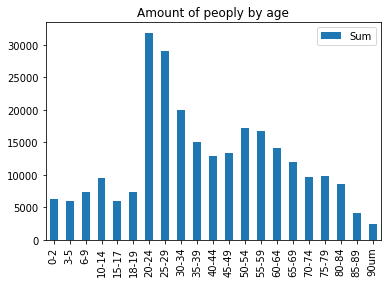

In [576]:
ax = pop_sum_age.plot.bar()
ax.set_title('Amount of peoply by age')

#### Highes bars are between the age 20 and 34

In [527]:
people = pop_sum['Sum'][0]
between = pop_sum['Sum'][9] + pop_sum['Sum'][10] + pop_sum['Sum'][11]
print(between)
print(between/people)

80751
0.31200157640949555


#### Over 80000 are between 20 and 34 years old (>30 percent)

#### Where do most people live

In [548]:
# Creating new dataframe with only the Districts and the people living there
cn = ['District', 'People'] 
pop_dis = pd.DataFrame(columns=cn)
pop_dis['District'] = population['Name']
pop_dis['People'] = population['Pers']
pop_dis = pop_dis.sort_values('People', ascending = False)
pop_dis = pop_dis.reset_index(drop = True)
pop_dis.head(8)

,District,People
0,Brand,17247
1,Eilendorf,15981
2,Forst,13467
3,Ponttor,12916
4,Haaren,12535
5,Hangeweiher,11680
6,Laurensberg,10662
7,Adalbertsteinweg,10212


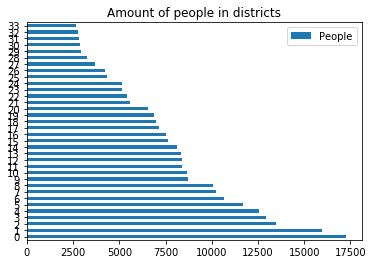

<Figure size 432x432 with 0 Axes>

In [575]:
ax = pop_dis[['District','People']].plot(kind = 'barh')
ax.set_title('Amount of people in districts')

#### Most people do not live in the most expensive areas If compared to the rent table

In [541]:
rent.reset_index(drop = True)

,District,Charge
0,Laurensberg,"7,71 Euro"
1,Center,"7,68 Euro"
2,Vaalserquartier,"7,57 Euro"
3,Richterich,"6,93 Euro"
4,Brand,"6,84 Euro"
5,Verlautenheide,"6,67 Euro"
6,Haaren,"6,65 Euro"
7,Eilendorf,"6,61 Euro"


In [579]:
# Merging dataframes for rental prices and amount of people
test = pd.merge(rent, pop_dis, on ='District')
test.head()

,District,Charge,People
0,Laurensberg,"7,71 Euro",10662
1,Vaalserquartier,"7,57 Euro",10068
2,Richterich,"6,93 Euro",8680
3,Brand,"6,84 Euro",17247
4,Haaren,"6,65 Euro",12535


# Conclusion:

The largest market in Aachen in terms of types of venues consists of Bars, Bakeries and Cafés. This is probably the case due to the high amount of people between 20 and 34 which make up more than 30% of the population(more than 80000 in total). Since most people do not live directly in the center of the city opening a store in different regions in order to save rental fees should not be a concern. 